In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 

In [2]:
df_apps = pd.read_csv(r"C:\Users\dell\Documents\Data analysis\OASIS INFOBYTE\apps\apps.csv")

In [3]:
df_reviews=pd.read_csv(r"C:\Users\dell\Documents\Data analysis\OASIS INFOBYTE\apps\user_reviews.csv")

In [4]:
merge_df = pd.merge(df_apps, df_reviews, on= 'App')

In [5]:
merge_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61556 entries, 0 to 61555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              61556 non-null  int64  
 1   App                     61556 non-null  object 
 2   Category                61556 non-null  object 
 3   Rating                  61556 non-null  float64
 4   Reviews                 61556 non-null  int64  
 5   Size                    41150 non-null  object 
 6   Installs                61556 non-null  object 
 7   Type                    61556 non-null  object 
 8   Price                   61556 non-null  object 
 9   Content Rating          61556 non-null  object 
 10  Genres                  61556 non-null  object 
 11  Last Updated            61556 non-null  object 
 12  Current Ver             61556 non-null  object 
 13  Android Ver             61556 non-null  object 
 14  Translated_Review       35929 non-null

In [7]:
merge_df.dropna(subset= 'Translated_Review', inplace = True)

In [8]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35929 entries, 0 to 61555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              35929 non-null  int64  
 1   App                     35929 non-null  object 
 2   Category                35929 non-null  object 
 3   Rating                  35929 non-null  float64
 4   Reviews                 35929 non-null  int64  
 5   Size                    24069 non-null  object 
 6   Installs                35929 non-null  object 
 7   Type                    35929 non-null  object 
 8   Price                   35929 non-null  object 
 9   Content Rating          35929 non-null  object 
 10  Genres                  35929 non-null  object 
 11  Last Updated            35929 non-null  object 
 12  Current Ver             35929 non-null  object 
 13  Android Ver             35929 non-null  object 
 14  Translated_Review       35929 non-null  obj

In [9]:
merge_df = merge_df.drop(columns = 'Size')

In [10]:
merge_df =merge_df.drop(columns = ['Unnamed: 0'])

In [11]:
merge_df.drop_duplicates(subset = 'Translated_Review', inplace = True)

In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26682 entries, 0 to 61555
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     26682 non-null  object 
 1   Category                26682 non-null  object 
 2   Rating                  26682 non-null  float64
 3   Reviews                 26682 non-null  int64  
 4   Installs                26682 non-null  object 
 5   Type                    26682 non-null  object 
 6   Price                   26682 non-null  object 
 7   Content Rating          26682 non-null  object 
 8   Genres                  26682 non-null  object 
 9   Last Updated            26682 non-null  object 
 10  Current Ver             26682 non-null  object 
 11  Android Ver             26682 non-null  object 
 12  Translated_Review       26682 non-null  object 
 13  Sentiment               26682 non-null  object 
 14  Sentiment_Polarity      26682 non-null  flo

In [13]:
merge_df.groupby('App')['Installs'].max().sort_values(ascending = False).head(10)

App
Candy Crush Saga                                      500,000,000+
Flipboard: News For Our Time                          500,000,000+
Facebook Lite                                         500,000,000+
Dropbox                                               500,000,000+
Google Translate                                      500,000,000+
Google Duo - High Quality Video Calls                 500,000,000+
Gboard - the Google Keyboard                          500,000,000+
Brain Waves - Binaural Beats                              500,000+
Breaking News, Local news, Attacks and Alerts Free        500,000+
DreamTrips                                                500,000+
Name: Installs, dtype: object

In [14]:
plot1= merge_df.groupby('Installs')['App'].nunique()
plot1 = pd.DataFrame(plot1)

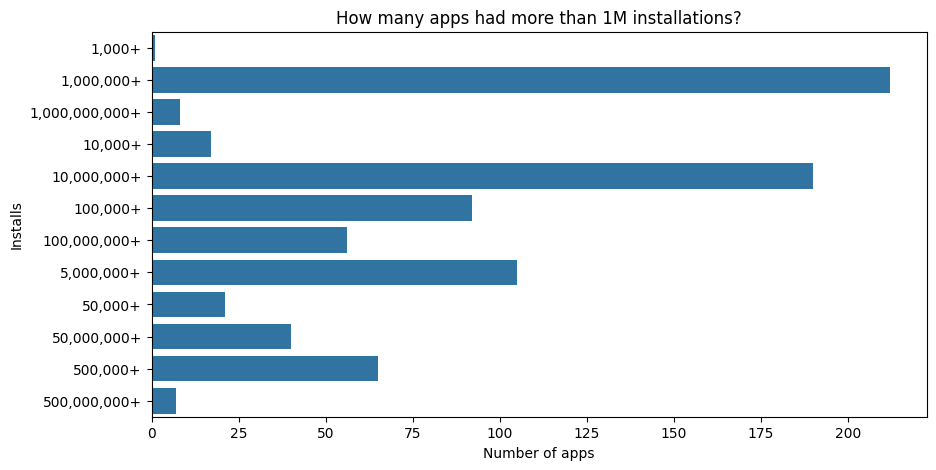

In [15]:
plt.figure(figsize = (10,5))
sea.barplot(x = 'App', y = 'Installs', data = plot1)
plt.xlabel('Number of apps')
plt.title('How many apps had more than 1M installations?')
plt.show()

In [16]:
plot2 = merge_df.groupby('Category')['Rating'].max().sort_values(ascending = False).head(10)
plot2=pd.DataFrame(plot2)

<function matplotlib.pyplot.show(close=None, block=None)>

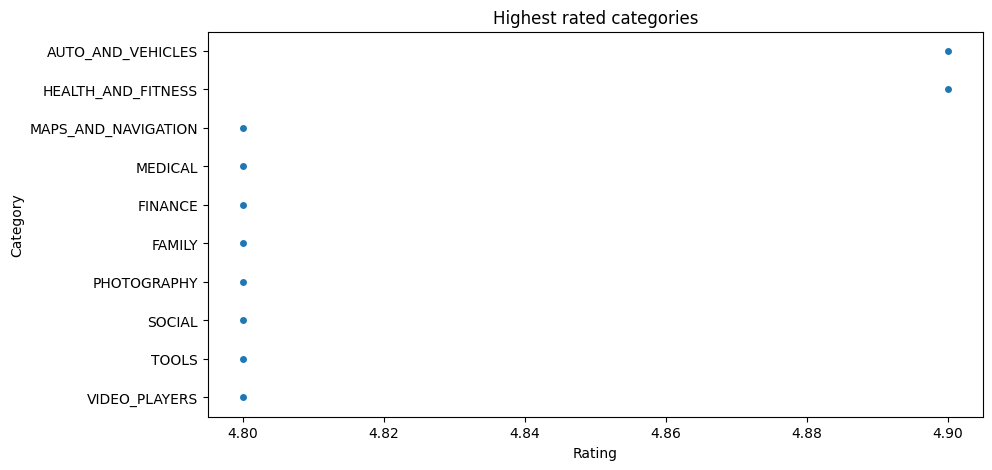

In [17]:
plt.figure(figsize=(10,5))
sea.stripplot(x = 'Rating', y = 'Category', data = plot2)
plt.title('Highest rated categories')
plt.show

In [18]:
merge_df.groupby('Type')['App'].nunique()

Type
Free    805
Paid      9
Name: App, dtype: int64

([<matplotlib.patches.Wedge at 0x1f112d72660>,
 [Text(-1.0993092618851201, 0.038976232932291924, 'Free'),
  Text(1.2991836771638952, -0.04606270715991456, 'Paid')],
 [Text(-0.5996232337555201, 0.021259763417613774, '98.9%'),
  Text(0.7994976474854738, -0.028346281329178193, '1.1%')])

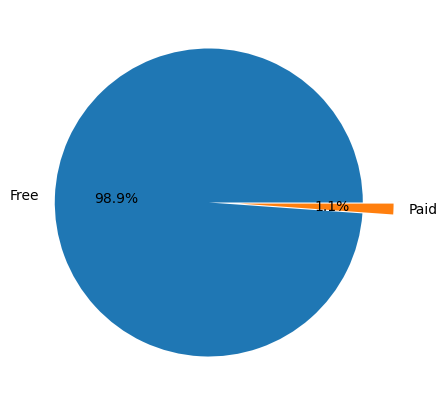

In [19]:
plt.figure(figsize = (10,5))
array = ['26381','301']
labels = ['Free', 'Paid']
explode = [0,0.2]
plt.pie(array , labels= labels , autopct='%1.1f%%', explode =explode  )

In [20]:
Free_apps = merge_df[merge_df['Type']=='Free']

In [21]:
plot3= Free_apps.groupby('Installs')['App'].nunique()
plot3 = pd.DataFrame(plot3)

In [22]:
paid_apps = merge_df[merge_df['Type']=='Paid']
plot4= paid_apps.groupby('Installs')['App'].nunique()
plot4 = pd.DataFrame(plot4)


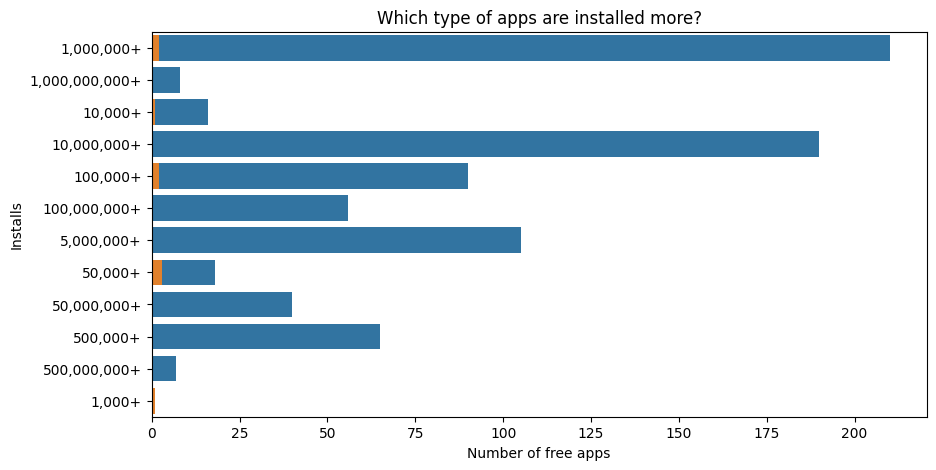

In [23]:
plt.figure(figsize = (10,5))
sea.barplot(x = 'App', y = 'Installs',data = plot3)
sea.barplot(x = 'App', y = 'Installs',data = plot4)
plt.xlabel('Number of free apps')
plt.title('Which type of apps are installed more?')
plt.show()

In [24]:
merge_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [25]:
merge_df.groupby('Category')['App'].nunique().sort_values(ascending = False)

Category
GAME                   93
FAMILY                 53
TOOLS                  47
TRAVEL_AND_LOCAL       41
HEALTH_AND_FITNESS     40
FINANCE                39
PRODUCTIVITY           37
PERSONALIZATION        34
MEDICAL                33
DATING                 33
COMMUNICATION          32
PHOTOGRAPHY            31
SPORTS                 31
ENTERTAINMENT          25
NEWS_AND_MAGAZINES     24
LIFESTYLE              23
EDUCATION              22
SHOPPING               20
BUSINESS               19
FOOD_AND_DRINK         18
SOCIAL                 18
BOOKS_AND_REFERENCE    16
HOUSE_AND_HOME         15
ART_AND_DESIGN         10
LIBRARIES_AND_DEMO      9
VIDEO_PLAYERS           9
PARENTING               8
AUTO_AND_VEHICLES       8
MAPS_AND_NAVIGATION     7
BEAUTY                  6
WEATHER                 6
EVENTS                  5
COMICS                  2
Name: App, dtype: int64

In [26]:
#sentiment analysis for apps in game category

In [27]:
df = merge_df [['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']]

In [28]:
sentiment_encode = []
for i in df['Sentiment']:
    if i == 'Positive':
        temp = 1
    elif i=='Neutral':
        temp = 0 
    else:
        temp =-1
    sentiment_encode.append(temp)
df['Sentiment'] = sentiment_encode

C:\Users\dell\AppData\Local\Temp\ipykernel_7220\2817232741.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = sentiment_encode


In [29]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [35]:
def clean_text(text):
    

    
    # Remove URLs
    import re
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back into string
    return ' '.join(tokens)
   
    

In [37]:
df['Translated_Review'] = df['Translated_Review'].str.lower()
df['clean_text'] = df['Translated_Review'].apply(clean_text)


C:\Users\dell\AppData\Local\Temp\ipykernel_7220\2649590150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Translated_Review'] = df['Translated_Review'].str.lower()
C:\Users\dell\AppData\Local\Temp\ipykernel_7220\2649590150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['Translated_Review'].apply(clean_text)


In [44]:
df= df.drop(columns = 'Translated_Review')

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vector = TfidfVectorizer()

In [51]:
x = vector.fit_transform(df['clean_text'])

In [53]:
y = df['Sentiment']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train_df, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.svm import SVC

In [64]:
model = SVC(kernel= 'linear')

In [65]:
model.fit(x_train_df,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [66]:
y_pred = model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score , classification_report

In [68]:
s= accuracy_score(y_pred, y_test)
c = classification_report(y_pred, y_test)

In [69]:
print('accuracy_score',s)
print('classification_report', c)

accuracy_score 0.8868278058834551
classification_report               precision    recall  f1-score   support

          -1       0.76      0.87      0.81      1063
           0       0.85      0.78      0.82       808
           1       0.94      0.91      0.93      3466

    accuracy                           0.89      5337
   macro avg       0.85      0.86      0.85      5337
weighted avg       0.89      0.89      0.89      5337



In [83]:
new_text = ['worst product ever']
new_vector = vector.transform(new_text)
new_prediction = model.predict(new_vector)

In [84]:
new_prediction

array([-1])